# PyTorch Multivariate LSTMs
https://charlieoneill.medium.com/predicting-the-price-of-bitcoin-with-multivariate-pytorch-lstms-695bc294130

Each row probably consists of several different columns; 
these are the features, or predictors, that we have information about at each time step. 
One of these columns is not a feature, however. It is the target we want to predict.

# Load and PreProcess Data

In [4]:
import os
import pandas as pd


path_to_file = os.path.join(os.getcwd(), 'data.csv')
df = pd.read_csv(path_to_file, index_col = 'Date', parse_dates=True)
df.drop(columns=['Adj Close'], inplace=True)
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2021-09-14,44960.050781,47218.125000,44752.332031,47092.492188,38652152880
2021-09-15,47098.000000,48450.468750,46773.328125,48176.347656,30484496466
2021-09-16,48158.906250,48486.828125,47079.558594,47783.359375,31764293754
2021-09-17,47771.003906,48160.921875,46832.523438,47267.519531,28727713711
2021-09-18,47273.527344,48791.781250,47087.285156,48278.363281,28575630451


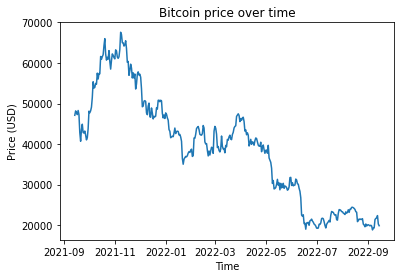

In [6]:
import matplotlib.pyplot as plt

plt.plot(df.Close)
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.title("Bitcoin price over time")
plt.savefig("initial_plot.png", dpi=250)
plt.show()

In [7]:
X, y = df.drop(columns=['Close']), df.Close.values
X.shape, y.shape

((366, 4), (366,))

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_trans = ss.fit_transform(X)
y_trans = mm.fit_transform(y.reshape(-1, 1))

In [10]:
import numpy as np

# split a multivariate sequence past, future samples (X and y)
def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):
    X, y = list(), list() # instantiate X and y
    for i in range(len(input_sequences)):
        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): break
        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x), y.append(seq_y)
    return np.array(X), np.array(y)

X_ss, y_mm = split_sequences(X_trans, y_trans, 100, 50)
print(X_ss.shape, y_mm.shape)

(218, 100, 4) (218, 50)
